## Shanice Bailey
# CryoSat-2: Dynamic Topography of Southern Ocean

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from glob import glob
import xarray as xr
import cartopy.crs as ccrs #cartopy coord ref sys
import cartopy
import cartopy.feature as cfeature

In [2]:
cs2 = 'CS2_combined_Southern_Ocean_2011-2016.nc'
ds = xr.open_dataset(cs2, decode_times=False)
ds

<xarray.Dataset>
Dimensions:    (X: 205, Y: 215, date: 72)
Coordinates:
  * date       (date) int32 201101 201102 201103 201104 201105 201106 201107 ...
  * X          (X) float32 -4475.0 -4425.0 -4375.0 -4325.0 -4275.0 -4225.0 ...
  * Y          (Y) float32 -4975.0 -4925.0 -4875.0 -4825.0 -4775.0 -4725.0 ...
Data variables:
    Latitude   (Y, X) float32 ...
    Longitude  (Y, X) float32 ...
    Area       (Y, X) float32 ...
    DOT        (date, Y, X) float32 ...
    SLA        (date, Y, X) float32 ...
    MDT        (Y, X) float32 ...
Attributes:
    Title:        CS2_combined_Southern_Ocean_2011-2016.nc
    Description:  Monthly merged dynamic ocean topography, sea level anomaly ...
    Projection::  Southern hemisphere SSM/I polar stereographic grid (https:/...
    Reference:    Armitage et al., Dynamic topography and sea level anomalies...

In [37]:
ds.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:    (X: 205, Y: 215, date: 72)
Coordinates:
  * date       (date) int32 201101 201102 201103 201104 201105 201106 201107 ...
  * X          (X) float32 -4475.0 -4425.0 -4375.0 -4325.0 -4275.0 -4225.0 ...
  * Y          (Y) float32 -4975.0 -4925.0 -4875.0 -4825.0 -4775.0 -4725.0 ...
Data variables:
    Latitude   (Y, X) float32 ...
    Longitude  (Y, X) float32 ...
    Area       (Y, X) float32 ...
    DOT        (date, Y, X) float32 ...
    SLA        (date, Y, X) float32 ...
    MDT        (Y, X) float32 ...
Attributes:
    Title:        CS2_combined_Southern_Ocean_2011-2016.nc
    Description:  Monthly merged dynamic ocean topography, sea level anomaly ...
    Projection::  Southern hemisphere SSM/I polar stereographic grid (https:/...
    Reference:    Armitage et al., Dynamic topography and sea level anomalies...>

In [56]:
ds.MDT

<xarray.DataArray 'MDT' (Y: 215, X: 205)>
array([[     nan, 9.321053, 8.922684, ...,      nan,      nan,      nan],
       [9.393326, 9.128281, 8.790092, ...,      nan,      nan,      nan],
       [9.084267, 8.876312, 8.625931, ...,      nan,      nan,      nan],
       ...,
       [4.762772, 4.755409, 4.733826, ...,      nan,      nan,      nan],
       [4.951439, 4.958145, 4.977036, ...,      nan,      nan,      nan],
       [     nan, 5.082672, 5.118813, ...,      nan,      nan,      nan]],
      dtype=float32)
Coordinates:
  * X        (X) float32 -4475.0 -4425.0 -4375.0 -4325.0 -4275.0 -4225.0 ...
  * Y        (Y) float32 -4975.0 -4925.0 -4875.0 -4825.0 -4775.0 -4725.0 ...
Attributes:
    units:       cm
    fill_value:  NaN

In [57]:
ds.info()

xarray.Dataset {
dimensions:
	X = 205 ;
	Y = 215 ;
	date = 72 ;

variables:
	int32 date(date) ;
		date:units = YYYYMM ;
	float32 X(X) ;
		X:units = km ;
		X:registration = grid cell centerpoint ;
	float32 Y(Y) ;
		Y:units = km ;
		Y:registration = grid cell centerpoint ;
	float32 Latitude(Y, X) ;
		Latitude:units = Degrees north ;
		Latitude:registration = grid cell centerpoint ;
	float32 Longitude(Y, X) ;
		Longitude:units = Degrees east ;
		Longitude:registration = grid cell centerpoint ;
	float32 Area(Y, X) ;
		Area:units = grid cell area [km^2] ;
	float32 DOT(date, Y, X) ;
		DOT:units = cm ;
		DOT:fill_value = NaN ;
	float32 SLA(date, Y, X) ;
		SLA:units = cm ;
		SLA:fill_value = NaN ;
	float32 MDT(Y, X) ;
		MDT:units = cm ;
		MDT:fill_value = NaN ;

// global attributes:
	:Title = CS2_combined_Southern_Ocean_2011-2016.nc ;
	:Description = Monthly merged dynamic ocean topography, sea level anomaly and mean sea surface records of the ice-covered and ice-free Southern Ocean between 2

In [93]:
ds.Longitude.sel([-78,20], method='nearest')

ValueError: the first argument to .sel must be a dictionary

In [124]:
ds.Longitude[-97]

<xarray.DataArray 'Longitude' (X: 205)>
array([-78.321205, -78.19293 , -78.061844, ...,  80.6616  ,  80.74245 ,
        80.821915], dtype=float32)
Coordinates:
  * X        (X) float32 -4475.0 -4425.0 -4375.0 -4325.0 -4275.0 -4225.0 ...
    Y        float32 925.0
Attributes:
    units:         Degrees east
    registration:  grid cell centerpoint

### Figure 4a)

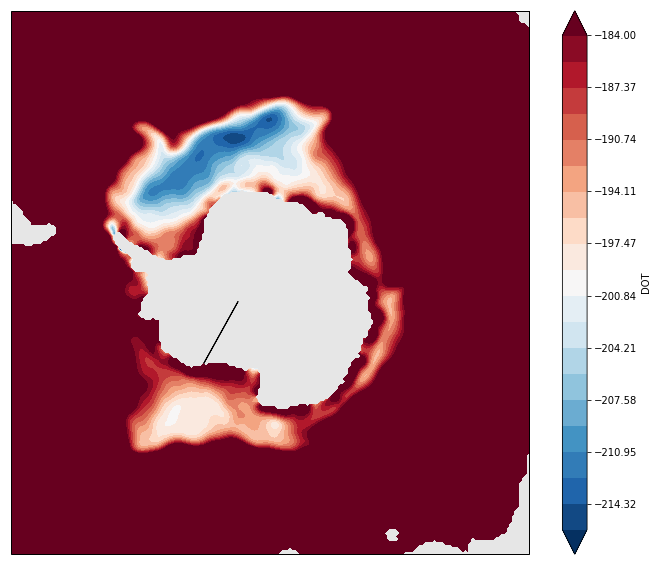

In [139]:
# How to add topographic contour lines?
# How to zoom in? Lat, Lon is messed up, the values I input in 'extent' are not reading as the actual 
# values. They depend on X,Y
#thick black line is 1km isobath

extent = [-78,20,-60,-75]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

proj = ccrs.SouthPolarStereo(central_lon, central_lat)

plt.figure(figsize=(12,10))
ax = plt.axes(projection=proj)
ax.add_feature(cfeature.LAND, facecolor='0.9', edgecolor='k')

#(ds.DOT.where(ds.isobath=1)).plot(ccrs.PlateCarree()) <-- trying to plot 1km isobath black line

#ax.add_feature(cfeature.Feature())

#ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m')) <-- trying to increase resolution

#ax.add_feature(cfeature.ShapelyFeature())

dot = ds.DOT.mean(dim='date').plot.contourf(transform=ccrs.SouthPolarStereo(central_longitude=central_lon), 
                                            levels=20, vmin=-216, vmax=-184, cmap='RdBu_r')

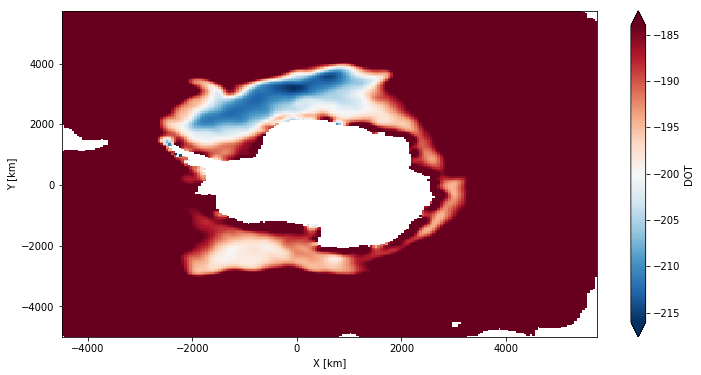

In [10]:
ds.DOT.sel(lon=slice(), lat=slice()).mean(dim='date').plot(figsize=(12,6), vmin=-216, vmax=-184, cmap='RdBu_r')
sel(Longitude=slice(-78,20), Latitude=slice(-60,-75)).

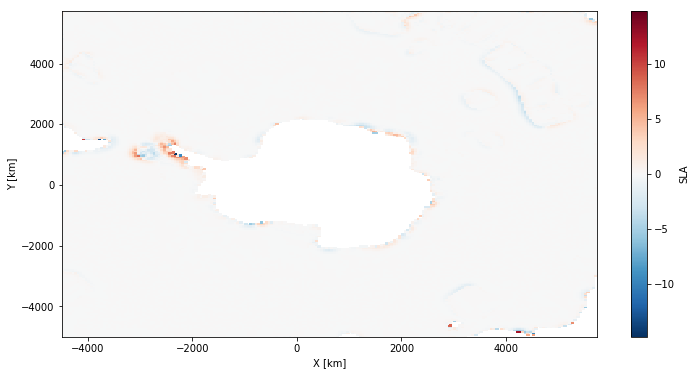

In [5]:
ds.SLA.mean(dim='date').plot(figsize=(12,6))

### Figure 6b)

In [2]:
taux = 'http://kage.ldeo.columbia.edu:81/home/.datasets/.ERA-1deg/.taux-ERA.nc/.taux/dods'
tauy = 'http://kage.ldeo.columbia.edu:81/home/.datasets/.ERA-1deg/.tauy-ERA.nc/.tauy/dods'

In [4]:
ds_taux = xr.open_dataset(taux, decode_times=False, chunks={'T': 100}).rename({'T':'time', 'X' : 'lon', 'Y' : 'lat'})
ds_taux['time'] = pd.date_range('1979-01-01',periods=ds_taux.time.size,freq='MS')
ds_taux

<xarray.Dataset>
Dimensions:  (lat: 181, lon: 360, time: 719)
Coordinates:
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 1979-03-01 ...
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 -85.0 -84.0 -83.0 ...
Data variables:
    taux     (time, lat, lon) float32 dask.array<shape=(719, 181, 360), chunksize=(100, 181, 360)>
Attributes:
    Conventions:  IRIDL